### 인공신경망 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [5]:
#번치라는 객체로 로드됨
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
X=iris.data #X가 넘파이 배열로 나옴

In [9]:
y=iris.target

In [13]:
#데이터 분할
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=100,random_state=1,stratify=y)

In [26]:
model=tf.keras.Sequential()

In [27]:
model.add(tf.keras.layers.Dense(16, input_shape=(4,),activation='sigmoid')) 
#은닉층(유닛개수=16, 입력유닛개수=4,활성함수)

In [28]:
#출력층(출력유닛개수=3, 활성함수=소프트맥스)
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [29]:
model.summary() 
# 파라미터개수의미 
# 80개는 input유닛 4개, 편향까지 4+1=5, 5*16=80, 입력층에서 은닉층으로 가는 가중치 개수
# 51은 (16+1)*3, 은닉층에서 출력픙으로 가중치의 개수

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [30]:
#모델 컴파일
#비용과 옵티마이저(사용할 최적화 알고리즘), 지표설정
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [31]:
#모델훈련
model.fit(X_train,y_train,epochs=10,batch_size=2) 
#한번에 2번씩 하겠다. 즉 미니배치를 이야기함
#10번 중에 2번씩 진행

Epoch 1/10
50/50 [==============================] - 0s 2ms/step - loss: 1.1570 - accuracy: 0.3300
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 1.0994 - accuracy: 0.3900
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 1.0573 - accuracy: 0.6000
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 1.0225 - accuracy: 0.6800
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.9925 - accuracy: 0.6700
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.9650 - accuracy: 0.6800
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.9367 - accuracy: 0.7000
Epoch 8/10
50/50 [==============================] - 0s 1ms/step - loss: 0.9113 - accuracy: 0.7100
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.8861 - accuracy: 0.7300
Epoch 10/10
50/50 [==============================] - 0s 2ms/step - loss: 0.8587 - accuracy: 0.7400


In [33]:
#모델 평가
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.8486 - accuracy: 0.6600


[0.8486312031745911, 0.6600000262260437]

### 패션 MNIST 

In [34]:
#데이터로드
#튜플형식으로 제공
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [36]:
X_train.shape

(60000, 28, 28)

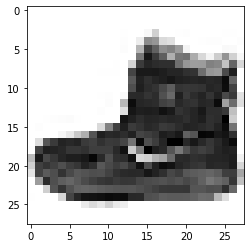

In [45]:
plt.imshow(X_train[0,:,:],cmap='Greys')

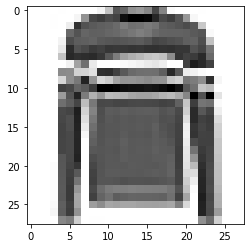

In [44]:
plt.imshow(X_train[5,:,:],cmap='Greys')

In [47]:
y_train[0] #Ankleboot

9

In [49]:
X_train=X_train / 255.0

In [50]:
X_test=X_test/255.0 #표준화

In [51]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [52]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7280 - accuracy: 0.7621 - val_loss: 0.5335 - val_accuracy: 0.8062
Epoch 2/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4906 - accuracy: 0.8303 - val_loss: 0.4595 - val_accuracy: 0.8355
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8462 - val_loss: 0.4573 - val_accuracy: 0.8383
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4149 - accuracy: 0.8545 - val_loss: 0.4651 - val_accuracy: 0.8283
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8615 - val_loss: 0.3952 - val_accuracy: 0.8588
Epoch 6/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3792 - accuracy: 0.8678 - val_loss: 0.3889 - val_accuracy: 0.8608
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3656 - accuracy: 0.8723 - val_loss: 0.3848 - val_accuracy:

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8810


[0.33363768458366394, 0.8809999823570251]